In [1]:
#dividir dados em duas partes
#matriz de features (x): tudo que sabemos antes da corrida
#vator alvo (y): o que queremos descobrir (position)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#carregar o dataset processado
df = pd.read_csv('../data/processed/f1_processed.csv')

#separar x (perguntas) e y (respostas)
X = df.drop('Position', axis=1)
y = df['Position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Treinando com {X_train.shape[0]} corridas.")
print(f"Treinando com {X_test.shape[0]} corridas.")

#criar e treinar modelo

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

#previsões nos dados de teste
y_pred = model.predict(X_test)

#avaliar erro
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"R² Score (Precisão): {r2:.2f}")



Treinando com 352 corridas.
Treinando com 88 corridas.
Modelo treinado com sucesso!
Erro Médio Absoluto (MAE): 3.32
R² Score (Precisão): 0.43


C:\Users\eduar\AppData\Local\Temp\ipykernel_2608\1871131662.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance, x='Importance', y='Feature', palette='viridis')


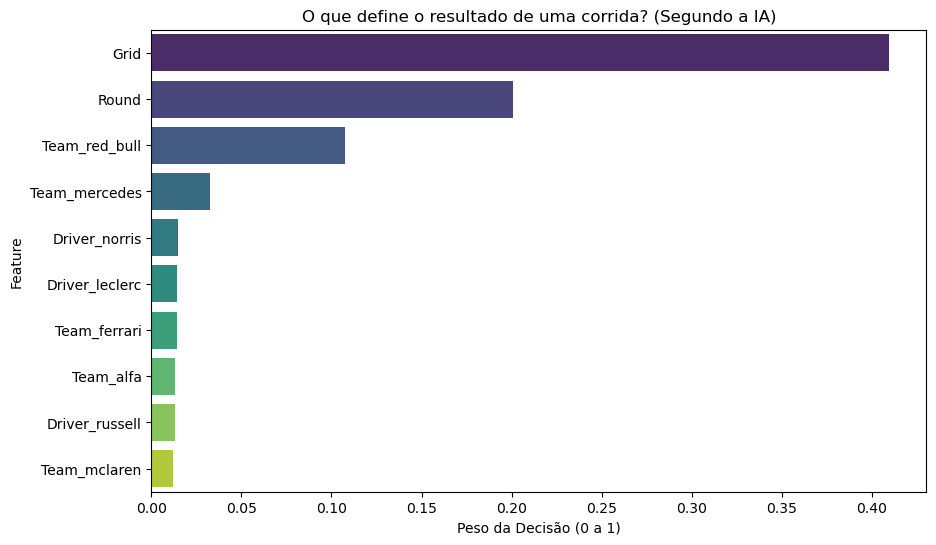

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#pegar a importância de cada coluna

importance = model.feature_importances_

#criar dataframe
df_importance = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance': importance
})

#ordenando do maior para o menor
df_importance = df_importance.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_importance, x='Importance', y='Feature', palette='viridis')
plt.title('O que define o resultado de uma corrida? (Segundo a IA)')
plt.xlabel('Peso da Decisão (0 a 1)')
plt.show()

In [ ]:
def predict_position(grid, team, pilot, round_num=22):
    data_input = {col: 0 for col in X_train.columns}

    data_input['Grid'] = grid
    data_input['Round'] = round_num

    if f'Team_{team}' in data_input:
        data_input[f'Team_{team}'] = 1
    
    if f'Driver_{pilot}' in data_input:
        data_input[f'Driver_{pilot}'] = 1

    df_test = pd.DataFrame([data_input])

    prevision = model.predict(df_test)[0]

    return prevision

p1 = predict_position(grid=1, team='red_bull', pilot='max_verstappen')
print(f"Verstappen largando em 1º chega em: {p1:.1f}º")

# Cenário 2: Verstappen largando em 10º (Corrida de Recuperação)
p2 = predict_position(grid=10, team='red_bull', pilot='max_verstappen')
print(f"Verstappen largando em 10º chega em: {p2:.1f}º")

# Cenário 3: Logan Sargeant largando em 1º (O Milagre)
p3 = predict_position(grid=1, team='williams', pilot='sargeant')
print(f"Sargeant largando em 1º chega em: {p3:.1f}º")

TypeError: unsupported format string passed to NoneType.__format__